### Exercise 7

1. Write a python script that reads the measurement data file and plots the following information: 

    a. Ship position 

    b. Ship heading

    c. Relative target position measurements


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import robotteknikk as rob

In [3]:
def rotMat2(theta):  
    # Returns a rotation matrix of angle theta
    R = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
    return R

In [4]:
# Set figure size
fig_width = 15
fig_height = 10
plt.rcParams['figure.figsize'] = [fig_width, fig_height]

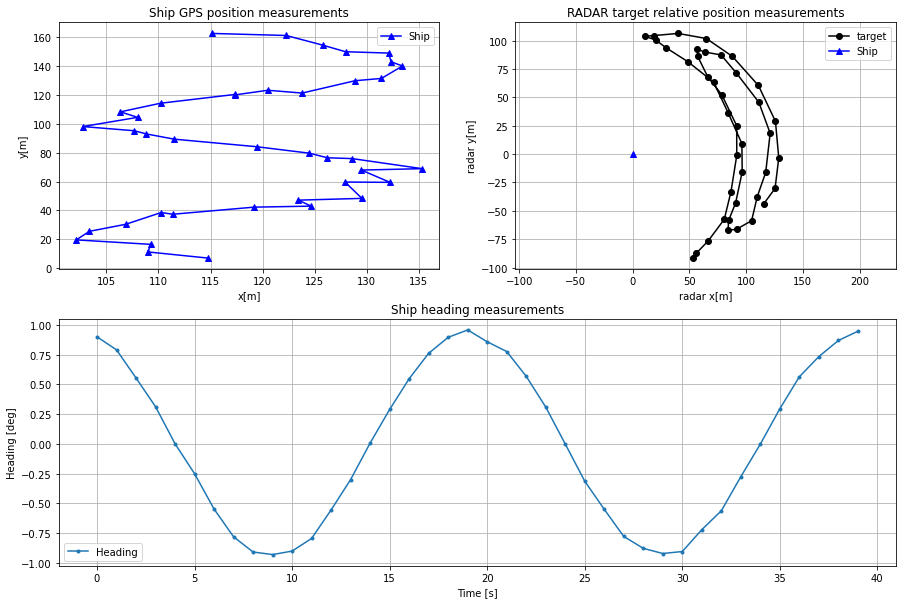

In [5]:
# Exercise 7.1 a,b,c.

# Import data from "radar_data.csv"
M = np.genfromtxt('radar_data.csv', delimiter=",")
N = M.shape[0] # Find the amount of rows in M


# Relative poses world, ship and target
OxS = M[:,0] # X-coordinates from world to ship
OyS = M[:,1] # Y-coordinates from world to ship
OpS = np.array([OxS,OyS]).T # Vector OpS

SxT = M[:,3] # X-coordinates from ship to target
SyT = M[:,4] # Y-coordinates from ship to target
SpT = np.array([SxT,SyT]).T # Vector SpT

theta = M[:,2]*np.pi/180 # heading angle related to ship, converted to radians

# Define figure
fig1 = plt.figure()

# Define first figure (upper left)
ax1 = fig1.add_subplot(2,2,1) 
ax1.plot(OpS[:,0], OpS[:,1], 'b^-', label='Ship')
ax1.set_xlabel('x[m]')
ax1.set_ylabel('y[m]')
ax1.set_title('Ship GPS position measurements')
#ax1.axis('equal')
ax1.legend()
ax1.grid()

# Define second figure (upper right)
ax2 = fig1.add_subplot(2,2,2)
ax2.plot(SpT[:,0], SpT[:,1],'ko-', label='target')
ax2.plot(0,0,'b^-', label='Ship')
ax2.set_xlabel('radar x[m]')
ax2.set_ylabel('radar y[m]')
ax2.set_title('RADAR target relative position measurements')
ax2.axis('equal') # Since we have 2 plots, we want equal scaling
ax2.legend()
ax2.grid()

# Define third figure (lower)
ax3 = fig1.add_subplot(2,1,2)
ax3.plot(theta,'.-',label='Heading')
ax3.set_xlabel('Time [s]')
ax3.set_ylabel('Heading [deg]')
ax3.set_title('Ship heading measurements')
ax3.legend()
ax3.grid()

2. Write a python script that uses the available measurements to estimate the trajectory of the target with respect to the origin reference frame {𝑂}. Plot the estimated target trajectory in world reference frame.

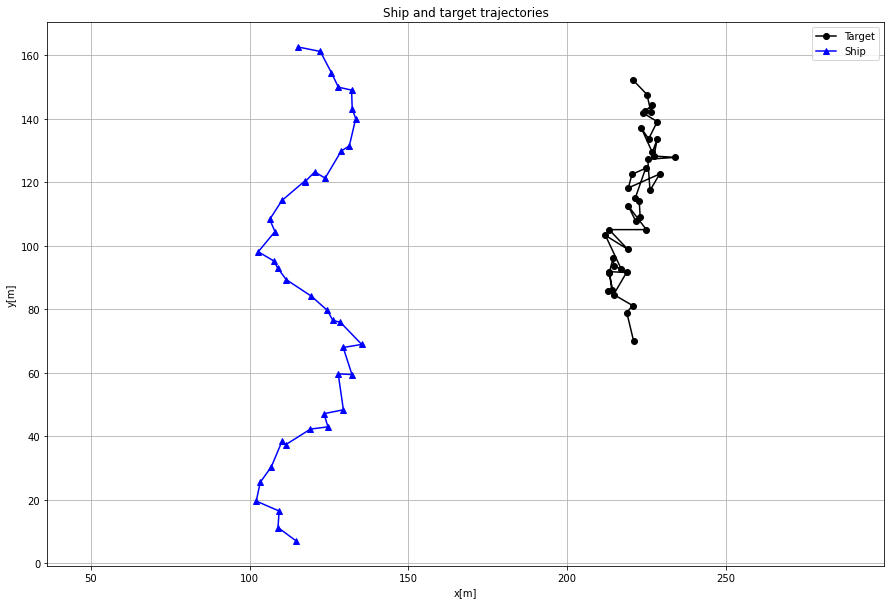

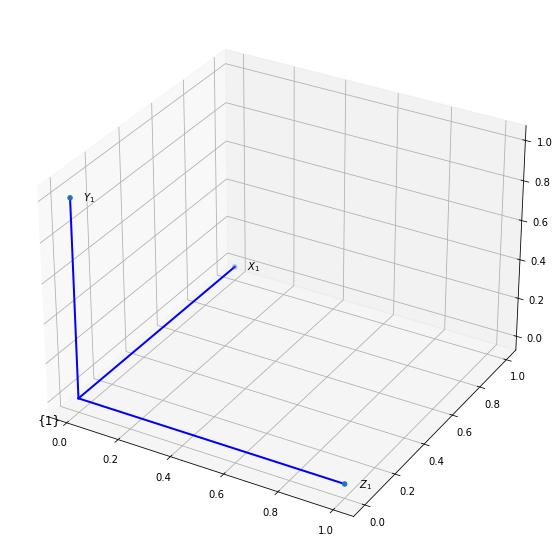

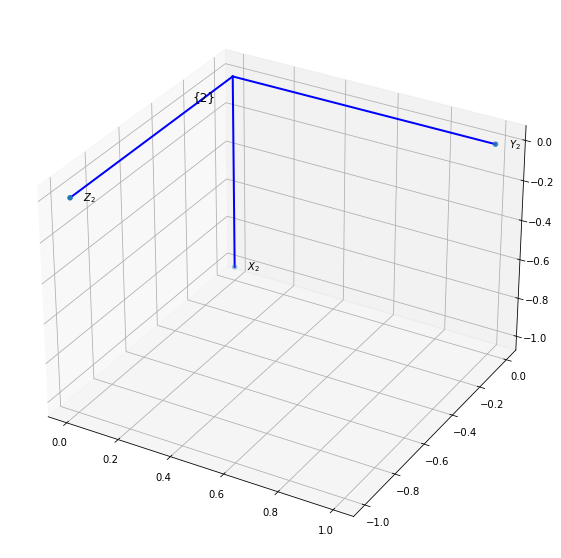

In [10]:
# Exercise 7.2

OpT = np.zeros((N,2)) # store target position [OxT OyT]

for i in range(N):
    OpT[i] = rotMat2(theta[i]).dot(SpT[i]) + OpS[i]

# Define figure
fig2 = plt.figure()

ax4 = fig2.add_subplot(1,1,1) 
ax4.plot(OpT[:,0],OpT[:,1], 'ko-', label='Target')
ax4.plot(OpS[:,0],OpS[:,1], 'b^-', label='Ship')
ax4.set_xlabel('x[m]')
ax4.set_ylabel('y[m]')
ax4.set_title('Ship and target trajectories')
ax4.axis('equal')
ax4.legend()
ax4.grid()


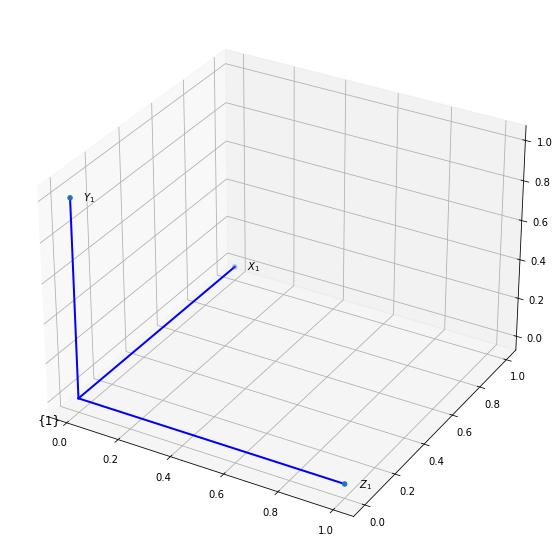

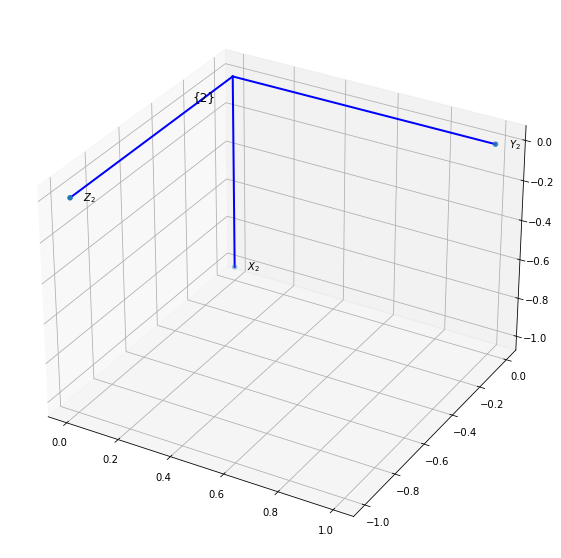

In [12]:
a = np.pi/2

T1 = rob.trotx(a).dot(rob.troty(a))
T2 = rob.troty(a).dot(rob.trotx(a))


fig1 = plt.figure()
ax = plt.axes(projection = '3d')
rob.trplot3(ax,T1, name="1",color ="b")

fig = plt.figure()
ax = plt.axes(projection = '3d')
rob.trplot3(ax,T2, name="2",color ="b")
